# Explore here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
#test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csvv")
#test_survived_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/gender_submission.csv")
#test_data["Survived"] = test_survived_data["Survived"]

###

total_data = pd.concat([train_data]).reset_index(inplace = False)
total_data.drop(columns = ["index"], inplace = True)
total_data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
total_data.shape


(48895, 16)

In [5]:
total_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
total_data.iloc[0]

id                                                              2539
name                              Clean & quiet apt home by the park
host_id                                                         2787
host_name                                                       John
neighbourhood_group                                         Brooklyn
neighbourhood                                             Kensington
latitude                                                    40.64749
longitude                                                  -73.97237
room_type                                               Private room
price                                                            149
minimum_nights                                                     1
number_of_reviews                                                  9
last_review                                               2018-10-19
reviews_per_month                                               0.21
calculated_host_listings_count    

In [7]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
total_data.isnull().sum(axis=0)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Of the 48,895 properties, Roughly 10K lack a review. 16 Lack a propperty name. 21 lack a host name. 

In [9]:
total_data['id'].value_counts#(normalize=True)

<bound method IndexOpsMixin.value_counts of 0            2539
1            2595
2            3647
3            3831
4            5022
           ...   
48890    36484665
48891    36485057
48892    36485431
48893    36485609
48894    36487245
Name: id, Length: 48895, dtype: int64>

In [10]:
total_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
#Price would be a more important describe analysis 

total_data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [12]:
total_data['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [13]:
total_data.duplicated()#.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

In [14]:
total_data.duplicated().sum()

0

In [15]:
total_data['id'].duplicated().sum()

0

In [16]:
total_data['host_id'].duplicated().sum()

11438

In [17]:
total_data['host_name'].duplicated().sum()

37442

In [18]:
total_data['neighbourhood'].nunique()

221

In [19]:
total_data['neighbourhood_group'].nunique()

5

In [20]:
total_data['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [21]:
#Latitude and Longitude don't seem important here to me

total_data = total_data.drop(["latitude", "longitude"], axis=1)
total_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2


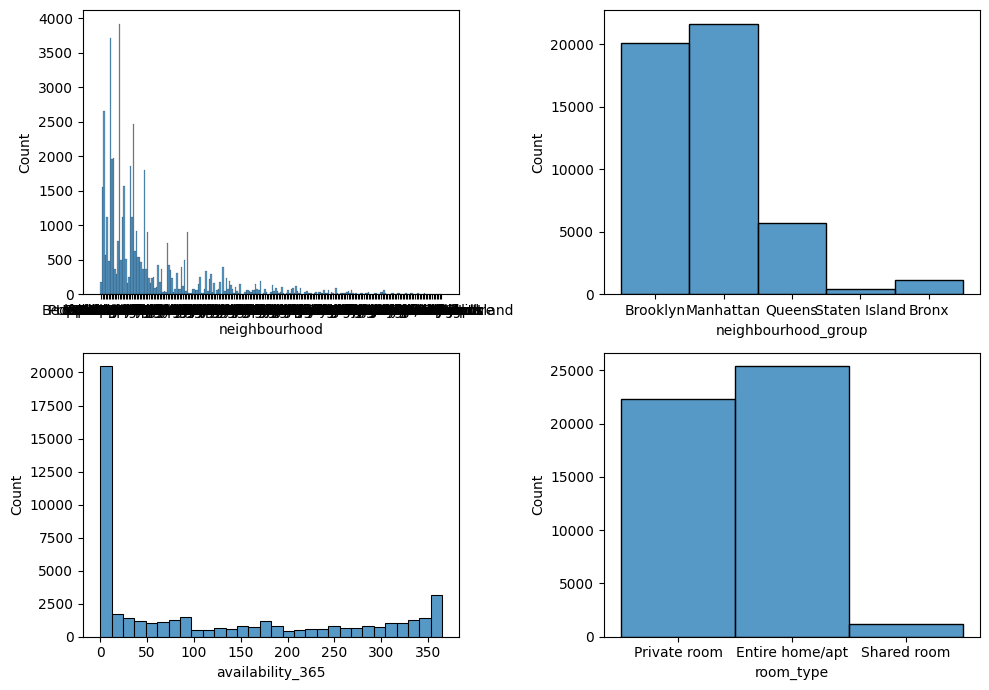

In [22]:
categorical_features = ['neighbourhood', 'availability_365', 'neighbourhood_group', 'room_type']

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = total_data, x = "neighbourhood")
sns.histplot(ax = axis[1, 0], data = total_data, x = "availability_365")
sns.histplot(ax = axis[0, 1], data = total_data, x = "neighbourhood_group")
sns.histplot(ax = axis[1, 1], data = total_data, x = "room_type")

# Adjust the layout
plt.tight_layout()

# Show the plot

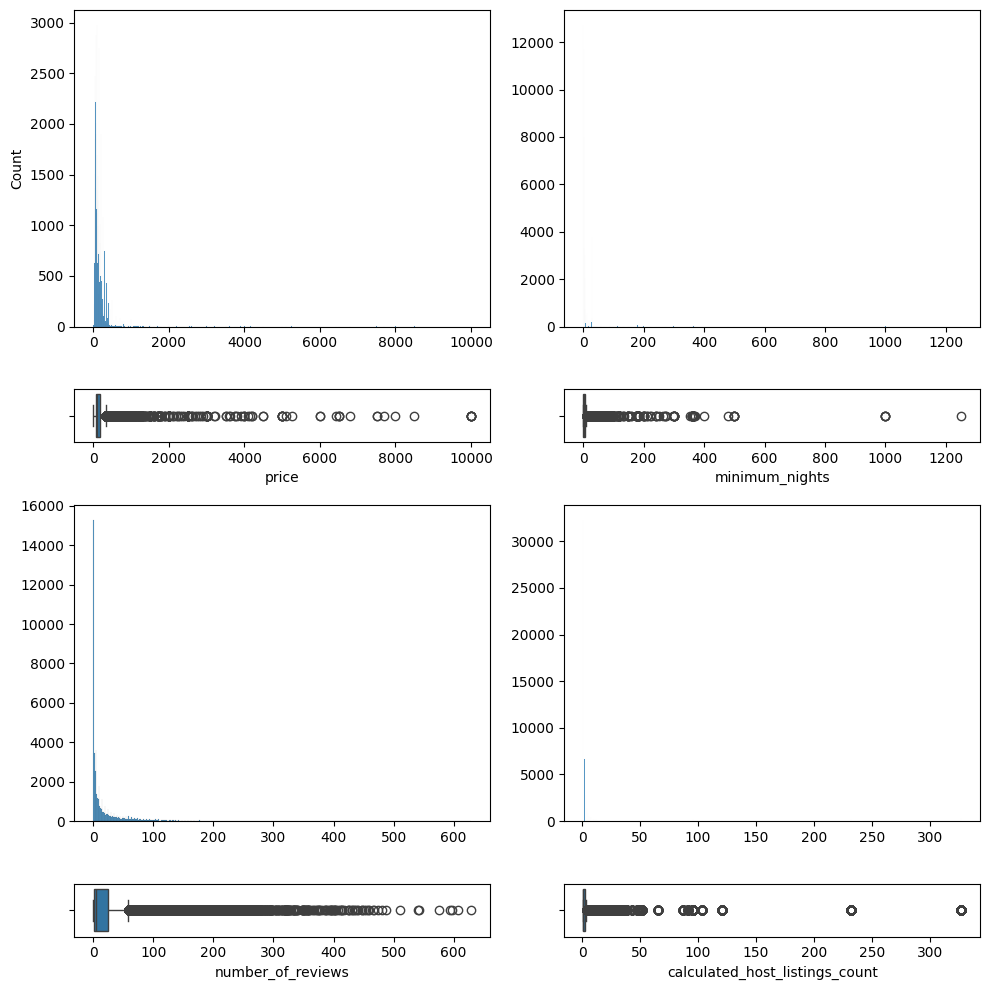

In [23]:
numerical_features = ['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count']

fig, axis = plt.subplots(4, 2, figsize = (10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = total_data, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")
sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = total_data, x = "number_of_reviews").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews")
sns.histplot(ax = axis[2, 1], data = total_data, x = "calculated_host_listings_count").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "calculated_host_listings_count")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
#Where is that outlier for price located?  I guessed Chelsea, Manhattan

max_price_index = total_data['price'].idxmax()
row_with_max_price = total_data.loc[max_price_index]

print(row_with_max_price)

id                                                            7003697
name                              Furnished room in Astoria apartment
host_id                                                      20582832
host_name                                                    Kathrine
neighbourhood_group                                            Queens
neighbourhood                                                 Astoria
room_type                                                Private room
price                                                           10000
minimum_nights                                                    100
number_of_reviews                                                   2
last_review                                                2016-02-13
reviews_per_month                                                0.04
calculated_host_listings_count                                      1
availability_365                                                    0
Name: 9151, dtype: o

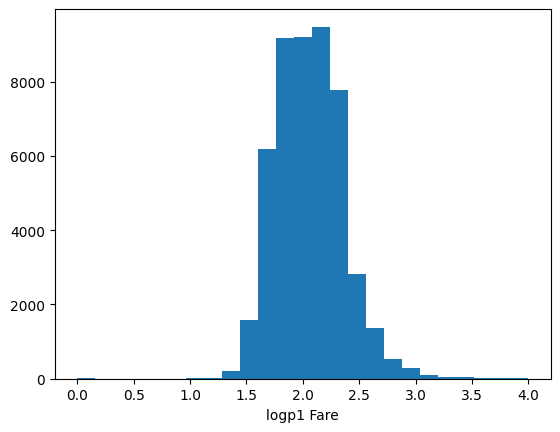

In [25]:
import numpy as np 

plt.hist(np.log10(total_data['price']+1), bins=25)
plt.xlabel('logp1 Fare')
plt.show()

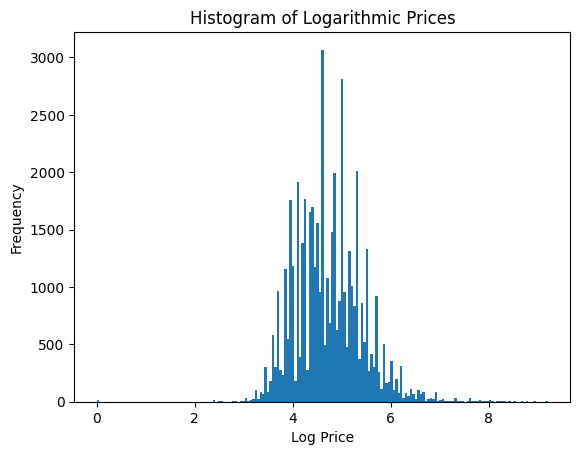

In [31]:
total_data['log_price'] = np.log(total_data['price']+1)

# Plot the histogram of the logarithmic prices
plt.hist(total_data['log_price'], bins='auto')
plt.title('Histogram of Logarithmic Prices')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()


In [26]:
#What is the numerical features in this project 

numerical_features

['price',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count']

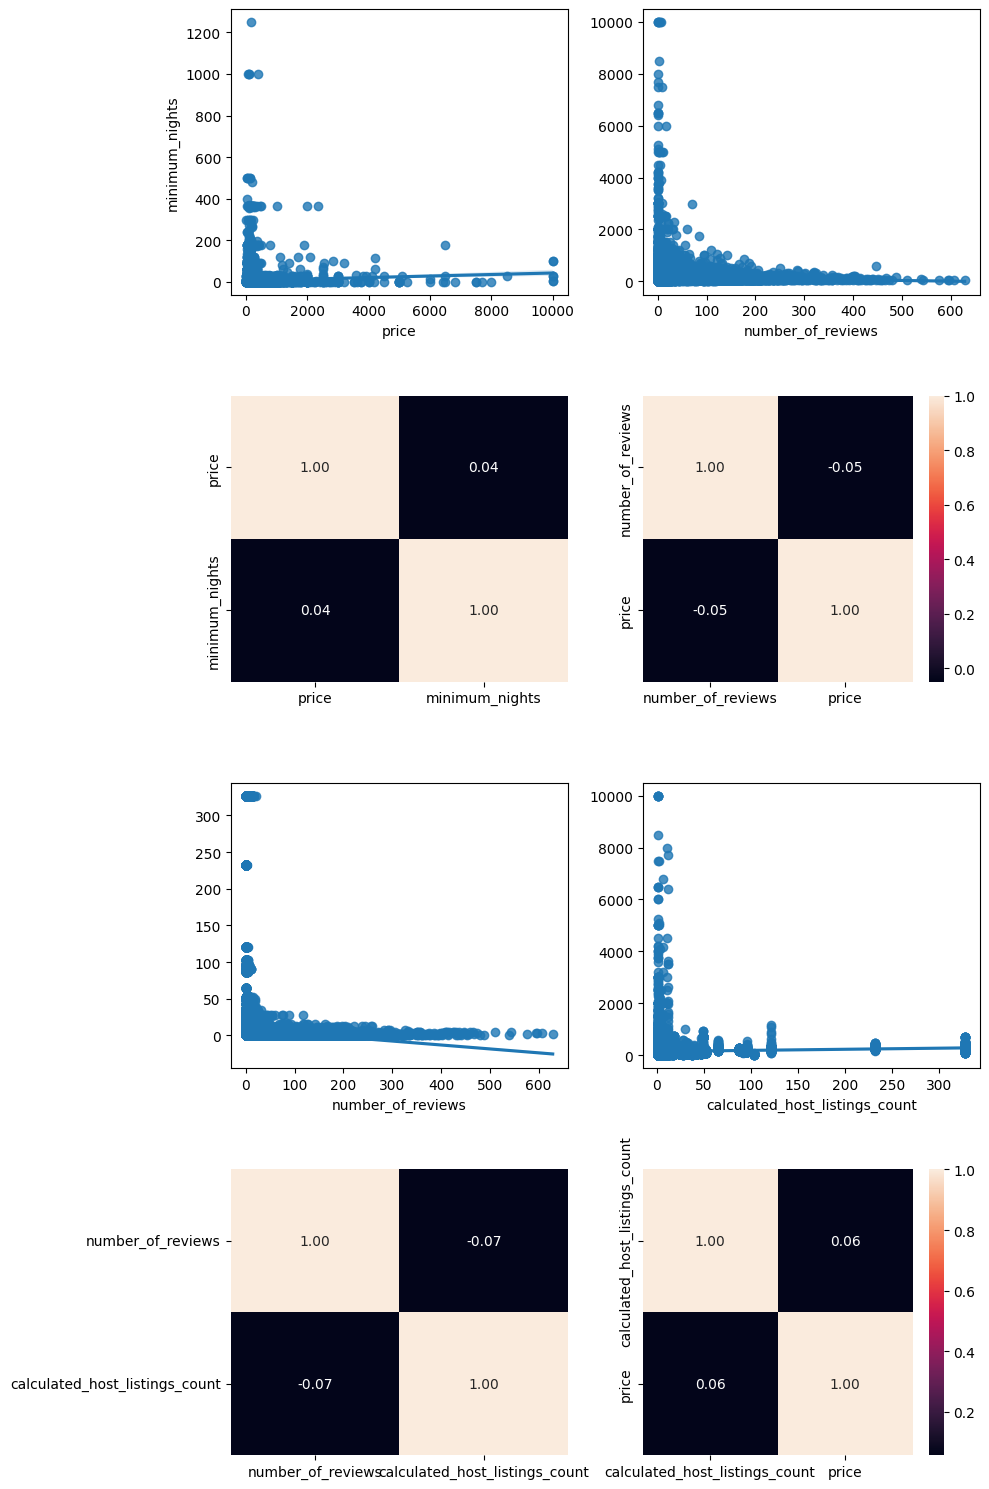

In [27]:
fig, axis = plt.subplots(4, 2, figsize = (10, 15))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "price", y = "minimum_nights")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(total_data[["number_of_reviews", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "number_of_reviews", y = "calculated_host_listings_count").set(ylabel=None)
sns.heatmap(total_data[["number_of_reviews", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar=False)

sns.regplot(ax = axis[2, 1], data = total_data, x = "calculated_host_listings_count", y = "price").set(ylabel=None)
sns.heatmap(total_data[["calculated_host_listings_count", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])



# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

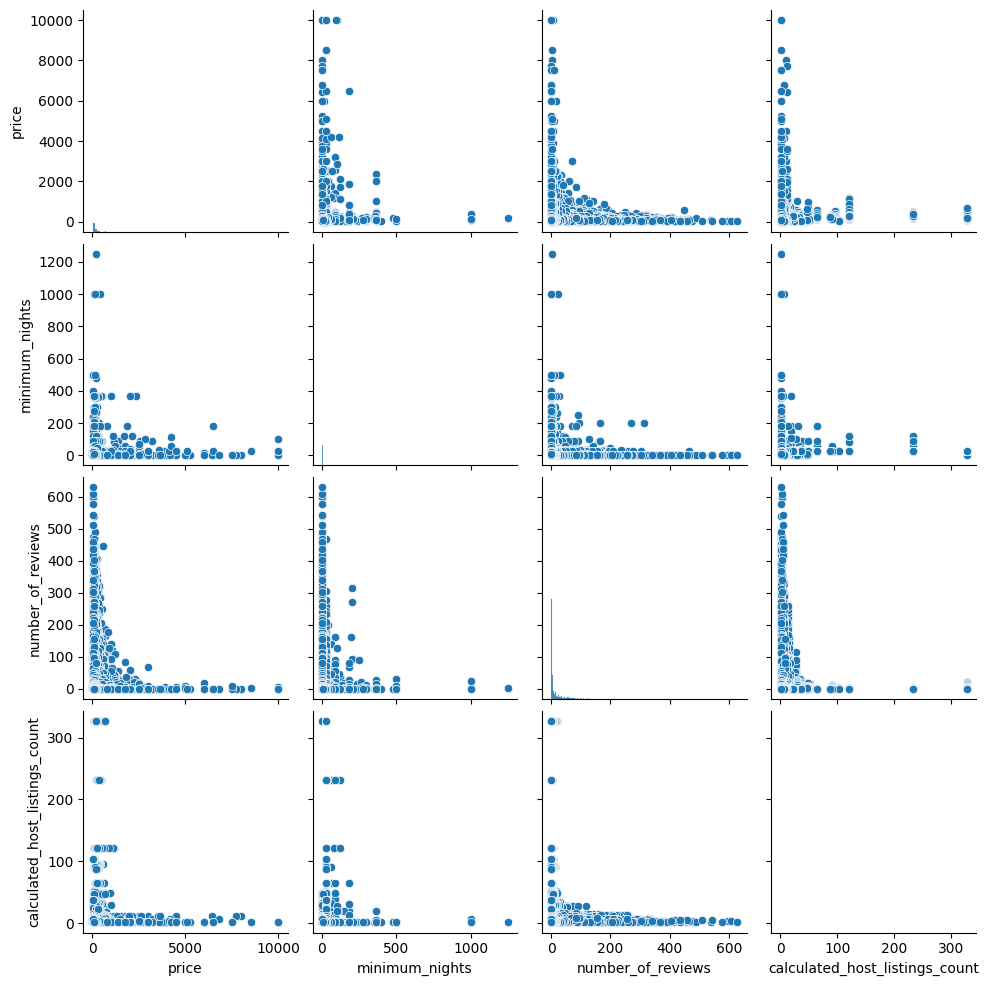

In [28]:
sns.pairplot(data = total_data[numerical_features + ['neighbourhood']])

#neighbourhood is not an int it's an object so it won't plot, without converting to an int 

In [29]:
total_data.describe().loc[['mean', 'min', '25%', '50%','75%', 'max']]

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


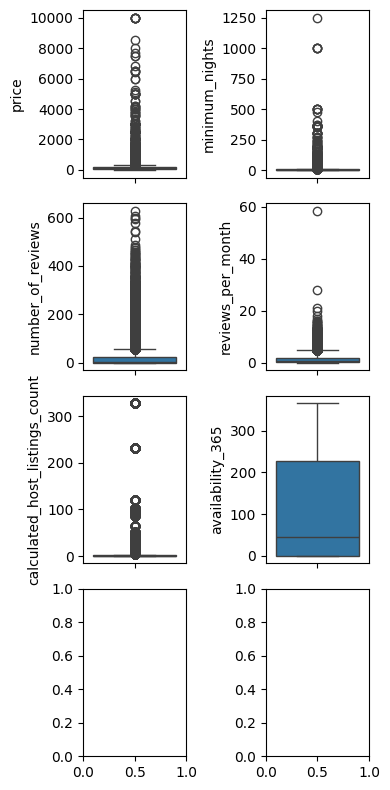

In [32]:
#plt.rcParams['figure.dpi'] = 100
fig, axis = plt.subplots(4, 2, figsize = (4, 8))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "price")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "reviews_per_month")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "availability_365")

plt.tight_layout()

plt.show()


In [35]:
Q_25 = total_data['price'].quantile(0.25)
Q_75 = total_data['price'].quantile(0.75)

IQR = Q_75 - Q_25

upper_limit = Q_75 + 1.5 * IQR
lower_limit = Q_25 - 2.5 * IQR

print(f"The upper and lower limits for finding price outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(IQR, 2)}")

The upper and lower limits for finding price outliers are 334.0 and -196.0, with an interquartile range of 106.0


In [37]:
total_data[total_data['price'] > 2000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,log_price
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,Private room,3000,7,0,NaN,NaN,1,365,8.006701
1862,826690,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,Entire home/apt,4000,4,0,NaN,NaN,1,83,8.294300
2018,893413,Architecturally Stunning Former Synagogue!,4751930,Martin,Manhattan,East Village,Entire home/apt,2500,30,15,2019-07-01,0.26,1,89,7.824446
2698,1448703,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,Entire home/apt,5000,1,2,2013-09-28,0.03,1,365,8.517393
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,Entire home/apt,6000,14,17,2015-02-17,0.27,1,359,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45867,34981637,bay ridge & sunset park furnished apartment,263564234,Nony,Brooklyn,Bay Ridge,Entire home/apt,4200,60,0,NaN,NaN,1,90,8.343078
46533,35297214,Amazing Chelsea 4BR Loft!,256649546,Viberlyn,Manhattan,Chelsea,Entire home/apt,2995,30,1,2019-06-24,1.00,1,214,8.005033
46614,35345358,Northside Williamsburg Stunner,956324,Alex,Brooklyn,Williamsburg,Entire home/apt,4500,30,0,NaN,NaN,1,365,8.412055
48043,36056808,Luxury TriBeCa Apartment at an amazing price,271248669,Jenny,Manhattan,Tribeca,Entire home/apt,6500,180,0,NaN,NaN,1,365,8.779711


In [38]:
total_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
log_price                             0
dtype: int64

In [39]:
(total_data.isnull().sum().sort_values() / len(total_data) * 100).round(3)

id                                 0.000
host_id                            0.000
neighbourhood_group                0.000
neighbourhood                      0.000
room_type                          0.000
price                              0.000
minimum_nights                     0.000
number_of_reviews                  0.000
calculated_host_listings_count     0.000
availability_365                   0.000
log_price                          0.000
name                               0.033
host_name                          0.043
last_review                       20.558
reviews_per_month                 20.558
dtype: float64

In [40]:
total_data[total_data['name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,log_price
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,Entire home/apt,400,1000,0,NaN,NaN,1,362,5.993961
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,Entire home/apt,200,1,28,2015-06-08,0.45,1,341,5.303305
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,Entire home/apt,225,1,1,2015-01-01,0.02,1,0,5.420535
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,Entire home/apt,215,7,5,2016-01-02,0.09,1,0,5.375278
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,Private room,150,1,0,NaN,NaN,1,0,5.017280
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,Private room,70,1,0,NaN,NaN,1,0,4.262680
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,Private room,40,1,0,NaN,NaN,1,0,3.713572
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,Private room,45,1,0,NaN,NaN,1,0,3.828641
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,Entire home/apt,190,4,1,2016-01-05,0.02,1,0,5.252273
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,Entire home/apt,300,5,0,NaN,NaN,5,0,5.707110


In [41]:
# Impute the missing ages with the median reviews per month 
median_reviews = total_data['reviews_per_month'].median()
total_data['reviews_per_month'] = total_data['reviews_per_month'].fillna(median_reviews)


In [43]:
total_data[total_data['reviews_per_month'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,log_price


In [44]:
(total_data.isnull().sum().sort_values() / len(total_data) * 100).round(3)

id                                 0.000
host_id                            0.000
neighbourhood_group                0.000
neighbourhood                      0.000
room_type                          0.000
price                              0.000
minimum_nights                     0.000
number_of_reviews                  0.000
reviews_per_month                  0.000
calculated_host_listings_count     0.000
availability_365                   0.000
log_price                          0.000
name                               0.033
host_name                          0.043
last_review                       20.558
dtype: float64

In [53]:
from datetime import datetime

# Convert 'last_review' to datetime format
total_data['last_review'] = pd.to_datetime(total_data['last_review'], errors='coerce')

# Use the current date as the reference date for calculating days since last review
reference_date = datetime.now()

# Calculate the number of days since the last review
total_data['days_since_last_review'] = (reference_date - total_data['last_review']).dt.days

# Calculate the median of days, excluding NaN
median_days = total_data['days_since_last_review'].median()

# Step 4: Replace NaN values in this new column with the median
total_data['days_since_last_review'].fillna(median_days, inplace=True)

# Now, total_data includes a 'days_since_last_review' column with NaNs replaced by the median
print(total_data[['last_review', 'days_since_last_review']])

                        last_review  days_since_last_review
0     2018-10-19 00:00:00.000000000                    1973
1     2019-05-21 00:00:00.000000000                    1759
2     1970-01-01 00:00:00.000001761                   19796
3     2019-07-05 00:00:00.000000000                    1714
4     2018-11-19 00:00:00.000000000                    1942
...                             ...                     ...
48890 1970-01-01 00:00:00.000001761                   19796
48891 1970-01-01 00:00:00.000001761                   19796
48892 1970-01-01 00:00:00.000001761                   19796
48893 1970-01-01 00:00:00.000001761                   19796
48894 1970-01-01 00:00:00.000001761                   19796

[48895 rows x 2 columns]


/tmp/ipykernel_5308/1487261499.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  total_data['days_since_last_review'].fillna(median_days, inplace=True)


In [55]:
total_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,log_price,days_since_last_review
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19 00:00:00.000000000,0.21,6,365,5.010635,1973
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21 00:00:00.000000000,0.38,2,355,5.420535,1759
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1970-01-01 00:00:00.000001761,0.72,1,365,5.017280,19796
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05 00:00:00.000000000,4.64,1,194,4.499810,1714
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19 00:00:00.000000000,0.10,1,0,4.394449,1942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,1970-01-01 00:00:00.000001761,0.72,2,9,4.262680,19796
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,Private room,40,4,0,1970-01-01 00:00:00.000001761,0.72,2,36,3.713572,19796
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,1970-01-01 00:00:00.000001761,0.72,1,27,4.753590,19796
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,1970-01-01 00:00:00.000001761,0.72,6,2,4.025352,19796


In [59]:
# Drop the 'last_review' column from the df
#total_data.drop('last_review', axis=1, inplace=True) # I already conduccted this step- now I just want to confirm the column is gone

# Display the df to confirm the column is dropped
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_price,days_since_last_review
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365,5.010635,1973
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355,5.420535,1759
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,0.72,1,365,5.017280,19796
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194,4.499810,1714
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0,4.394449,1942


In [60]:
(total_data.isnull().sum().sort_values() / len(total_data) * 100).round(3)

id                                0.000
host_id                           0.000
neighbourhood_group               0.000
neighbourhood                     0.000
room_type                         0.000
price                             0.000
minimum_nights                    0.000
number_of_reviews                 0.000
reviews_per_month                 0.000
calculated_host_listings_count    0.000
availability_365                  0.000
log_price                         0.000
days_since_last_review            0.000
name                              0.033
host_name                         0.043
dtype: float64